In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
import warnings

In [7]:
warnings.filterwarnings('ignore')

In [8]:
train_df=pd.read_csv('/content/train_yaOffsB.csv')

In [9]:
test_df=pd.read_csv('/content/test_pFkWwen.csv')

In [10]:
train_df.shape

(88858, 10)

In [11]:
test_df.shape

(59310, 9)

In [12]:
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [13]:
test_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [14]:
#Combining the train and test for preprocessing
data=pd.concat([train_df,test_df],axis='index')

In [15]:
data=data.reset_index()

In [16]:
data.duplicated().sum()

0

In [17]:
data['Crop_Damage'].value_counts()

0.0    74238
1.0    12307
2.0     2313
Name: Crop_Damage, dtype: int64

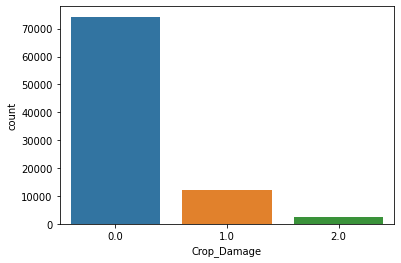

In [18]:
sns.countplot(data['Crop_Damage'])

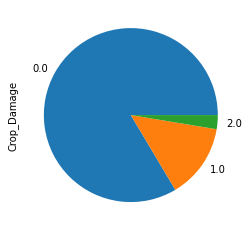

In [19]:
data['Crop_Damage'].value_counts().plot(kind='pie')

In [20]:
data.columns

Index(['index', 'ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [21]:
data.describe()

,index,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,148168.000000,133275.000000,148168.000000,148168.000000,88858.000000
mean,38514.632363,1398.212401,0.285453,0.457096,2.263802,25.850724,28.656485,9.565324,1.898527,0.190562
std,23755.823477,849.197419,0.451631,0.498158,0.461755,15.525407,12.403662,9.882540,0.701568,0.454215
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,18520.750000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,37041.500000,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,55562.250000,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,88857.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148168 entries, 0 to 148167
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    148168 non-null  int64  
 1   ID                       148168 non-null  object 
 2   Estimated_Insects_Count  148168 non-null  int64  
 3   Crop_Type                148168 non-null  int64  
 4   Soil_Type                148168 non-null  int64  
 5   Pesticide_Use_Category   148168 non-null  int64  
 6   Number_Doses_Week        148168 non-null  int64  
 7   Number_Weeks_Used        133275 non-null  float64
 8   Number_Weeks_Quit        148168 non-null  int64  
 9   Season                   148168 non-null  int64  
 10  Crop_Damage              88858 non-null   float64
dtypes: float64(2), int64(8), object(1)
memory usage: 12.4+ MB


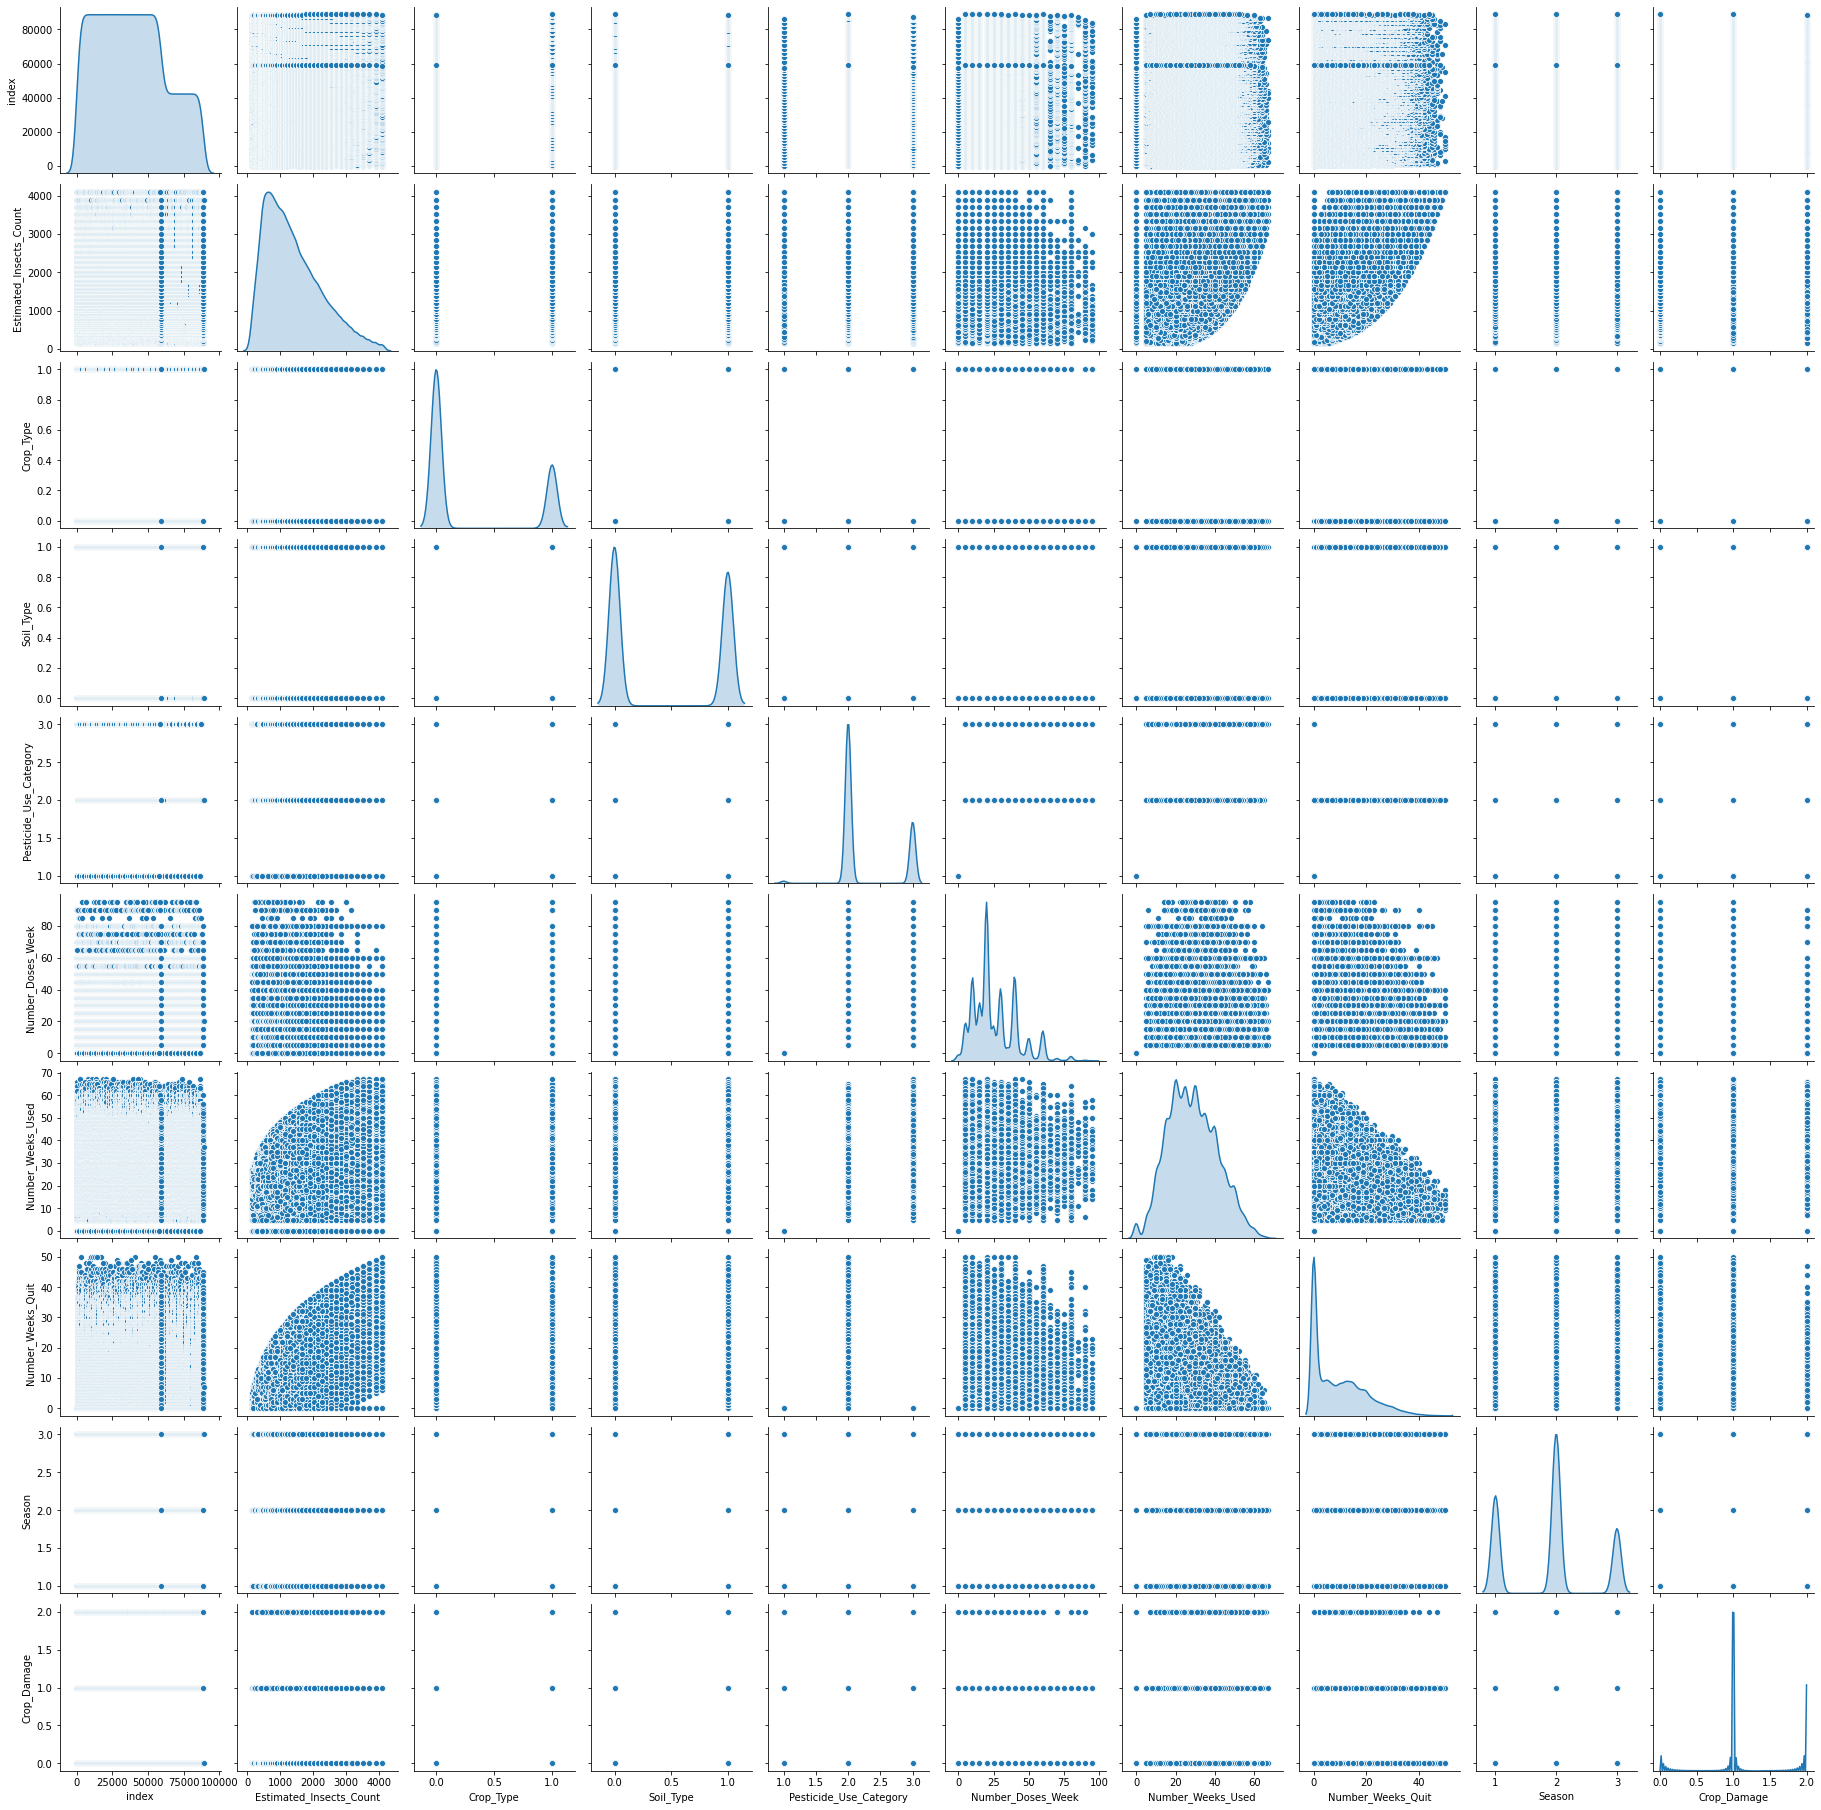

In [22]:
sns.pairplot(data,diag_kind='kde')

In [23]:
data.isna().sum()

index                          0
ID                             0
Estimated_Insects_Count        0
Crop_Type                      0
Soil_Type                      0
Pesticide_Use_Category         0
Number_Doses_Week              0
Number_Weeks_Used          14893
Number_Weeks_Quit              0
Season                         0
Crop_Damage                59310
dtype: int64

In [24]:
data['Estimated_Insects_Count'].nunique()

71

In [25]:
data['Estimated_Insects_Count'].value_counts()

1132    5664
1212    5639
1478    5590
1385    5580
1056    5368
        ... 
3896     237
3515     220
4097     194
231      150
169      103
Name: Estimated_Insects_Count, Length: 71, dtype: int64

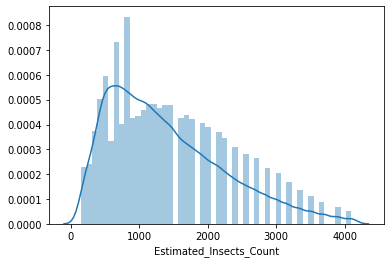

In [26]:
sns.distplot(data['Estimated_Insects_Count'])

In [161]:
#Removing Outliers for Estimated_Insects_Count

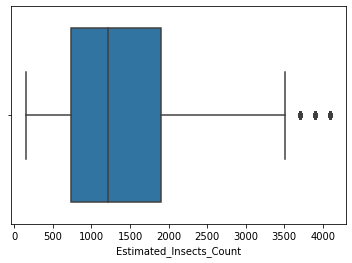

In [27]:
sns.boxplot(data['Estimated_Insects_Count'])

In [28]:
median=data['Estimated_Insects_Count'].median()

In [29]:
Q1,Q3=np.percentile(data['Estimated_Insects_Count'],[25,75])

In [30]:
print("Q1 is {}, Q3 is {}".format(Q1,Q3))

Q1 is 731.0, Q3 is 1898.0


In [31]:

IQR=Q3-Q1
LW=Q1 - 1.5*IQR
UW=Q3 + 1.5*IQR

In [32]:
print("IQR is {}, Lower Whisker is {}, Upper Whisker is {}".format(IQR,LW,UW))

IQR is 1167.0, Lower Whisker is -1019.5, Upper Whisker is 3648.5


In [33]:
index=data[data['Estimated_Insects_Count']>3648.5]['Estimated_Insects_Count'].index

In [34]:
len(index)

2430

In [162]:
#imputing using median

In [36]:
for i in index:
  data.loc[i,'Estimated_Insects_Count']=data['Estimated_Insects_Count'].median()

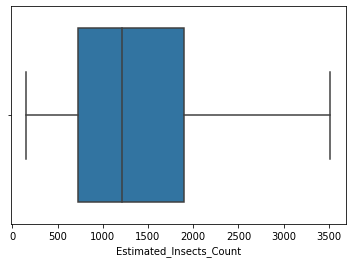

In [39]:
sns.boxplot(data['Estimated_Insects_Count'])

In [163]:
#Log Transform the data

In [40]:
data['Estimated_Insects_Count']=np.log(data['Estimated_Insects_Count'])

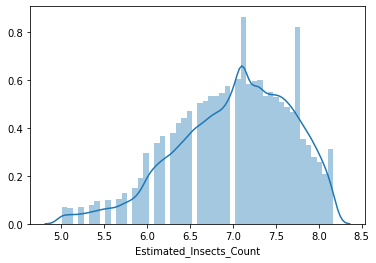

In [164]:
sns.distplot(data['Estimated_Insects_Count'])

In [42]:
data['Crop_Type'].value_counts()

0    105873
1     42295
Name: Crop_Type, dtype: int64

In [43]:
data['Soil_Type'].value_counts()

0    80441
1    67727
Name: Soil_Type, dtype: int64

In [46]:
data['Pesticide_Use_Category'].value_counts()

2    106265
3     40495
1      1408
Name: Pesticide_Use_Category, dtype: int64

In [47]:
# data['Pesticide_Use_Category'].replace({1:'Pest1',2:'Pest2',3:'Pest3'},inplace=True)

In [48]:
data['Pesticide_Use_Category'].value_counts()

2    106265
3     40495
1      1408
Name: Pesticide_Use_Category, dtype: int64

In [50]:
data['Number_Doses_Week'].value_counts()

20    37627
40    20747
10    20170
30    17322
15    13710
5      9173
25     8090
60     7295
50     5565
35     3039
45     1544
0      1408
80     1047
70      554
55      456
90      135
65      130
75       98
95       41
85       17
Name: Number_Doses_Week, dtype: int64

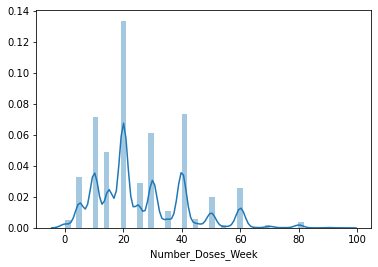

In [51]:
sns.distplot(data['Number_Doses_Week'])

In [165]:
#Removing Outliers in Number_Doses_Week

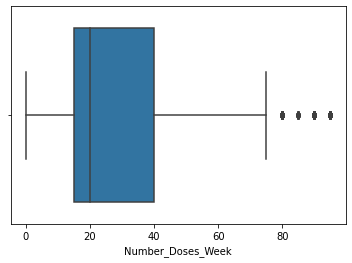

In [52]:
sns.boxplot(data['Number_Doses_Week'])

In [53]:
median=data['Number_Doses_Week'].median()

In [54]:
Q1,Q3=np.percentile(data['Number_Doses_Week'],[25,75])

In [55]:
print("Q1 is {}, Q3 is {}".format(Q1,Q3))

Q1 is 15.0, Q3 is 40.0


In [56]:
IQR=Q3-Q1

In [57]:
LW=Q1-(1.5*IQR)
UW=Q3+(1.5*IQR)

In [58]:
print("IQR is {}, Lower Whisker is {}, Upper Whisker is {}".format(IQR,LW,UW))

IQR is 25.0, Lower Whisker is -22.5, Upper Whisker is 77.5


In [59]:
index=data[data['Number_Doses_Week']>77.5].index

In [60]:
for i in index:
  data.loc[i,'Number_Doses_Week']=data['Number_Doses_Week'].median()

In [166]:
#Number of Weeks Used

In [64]:
data['Number_Weeks_Used'].isna().sum()

14893

In [167]:
#Imputing based on the crop type

In [66]:
data.groupby('Crop_Type')['Number_Weeks_Used'].median()

Crop_Type
0    28.0
1    27.0
Name: Number_Weeks_Used, dtype: float64

In [67]:
data.loc[(data['Crop_Type'] == 0 ) & (data['Number_Weeks_Used'].isnull()), 'Number_Weeks_Used']=28.0


In [68]:
data.loc[(data['Crop_Type'] == 1 ) & (data['Number_Weeks_Used'].isnull()), 'Number_Weeks_Used']=27.0


In [69]:
data['Number_Weeks_Used'].isna().sum()

0

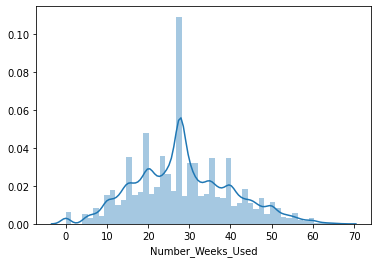

In [70]:
sns.distplot(data['Number_Weeks_Used'])

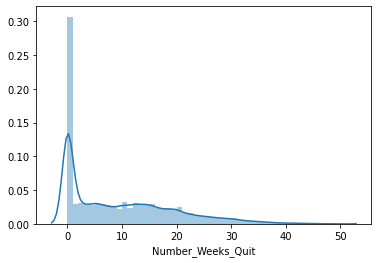

In [71]:
sns.distplot(data['Number_Weeks_Quit'])

In [168]:
#Imputing outliers using median

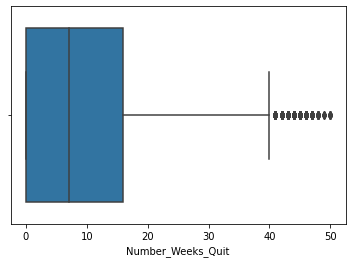

In [72]:
sns.boxplot(data['Number_Weeks_Quit'])

In [73]:
median=data['Number_Weeks_Quit'].median()

In [74]:
Q1,Q3=np.percentile(data['Number_Weeks_Quit'],[25,75])

In [75]:
print("Q1 is {}, Q3 is {}".format(Q1,Q3))

Q1 is 0.0, Q3 is 16.0


In [76]:
IQR=Q3-Q1
LW=Q1-(1.5*IQR)
UW=Q3+(1.5*IQR)

In [77]:
print("IQR is {}, Lower Whisker is {}, Upper Whisker is {}".format(IQR,LW,UW))

IQR is 16.0, Lower Whisker is -24.0, Upper Whisker is 40.0


In [78]:
index=data[data['Number_Weeks_Quit']>40.0].index

In [79]:
for i in index:
  data.loc[i,'Number_Weeks_Quit']=data['Number_Weeks_Quit'].median()

In [80]:
data['Number_Weeks_Quit'].isnull().sum()

0

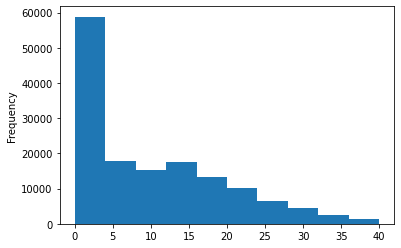

In [89]:
data['Number_Weeks_Quit'].plot(kind='hist')

In [169]:
#We could see there are lots of zeros. Converting using box cox

In [90]:
from scipy import stats
from scipy.special import inv_boxcox


In [92]:
index=data[data['Number_Weeks_Quit']==0].index

In [93]:
for i in index:
  data.loc[i,'Number_Weeks_Quit']=0.1

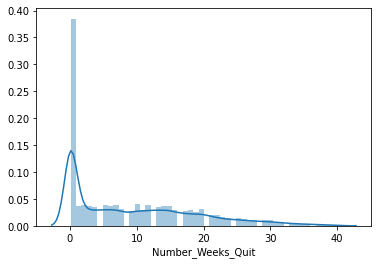

In [94]:
sns.distplot(data['Number_Weeks_Quit'])

In [95]:
fit_data,fit_lmbda=stats.boxcox(data['Number_Weeks_Quit'])

In [96]:
data['fit_data']=fit_data

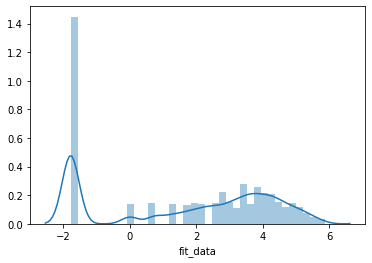

In [97]:
sns.distplot(data['fit_data'])

In [100]:
data.drop(columns={'Number_Weeks_Quit'},inplace=True)

In [101]:
data['Season'].value_counts()

2    73715
1    44744
3    29709
Name: Season, dtype: int64

In [103]:
data['Season'].value_counts()

2    73715
1    44744
3    29709
Name: Season, dtype: int64

In [104]:
data.head()

,index,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Season,Crop_Damage,fit_data
0,0,F00000001,5.236442,1,0,1,0.0,0.0,1,0.0,-1.78098
1,1,F00000003,5.342334,1,0,1,0.0,0.0,2,1.0,-1.78098
2,2,F00000004,5.549076,1,0,1,0.0,0.0,2,1.0,-1.78098
3,3,F00000005,5.549076,1,1,1,0.0,0.0,2,1.0,-1.78098
4,4,F00000006,5.834811,1,0,1,0.0,0.0,2,1.0,-1.78098


In [105]:
df=data.drop(columns={'ID'})

In [107]:
df=df.drop(columns={'index'})

In [108]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Season,Crop_Damage,fit_data
Estimated_Insects_Count,1.000000,-0.107715,-0.053704,-0.117166,-0.069196,0.418155,0.001873,0.184947,0.234192
Crop_Type,-0.107715,1.000000,-0.289331,0.234132,-0.186575,-0.045886,0.002445,-0.016495,-0.269515
Soil_Type,-0.053704,-0.289331,1.000000,0.034108,0.078533,-0.063623,0.000163,-0.021997,-0.010168
Pesticide_Use_Category,-0.117166,0.234132,0.034108,1.000000,0.004707,0.325831,-0.000078,0.175002,-0.766478
Number_Doses_Week,-0.069196,-0.186575,0.078533,0.004707,1.000000,0.121976,0.000360,-0.028753,0.016145
Number_Weeks_Used,0.418155,-0.045886,-0.063623,0.325831,0.121976,1.000000,0.001224,0.219499,-0.374420
Season,0.001873,0.002445,0.000163,-0.000078,0.000360,0.001224,1.000000,-0.000184,0.002198
Crop_Damage,0.184947,-0.016495,-0.021997,0.175002,-0.028753,0.219499,-0.000184,1.000000,-0.199389
fit_data,0.234192,-0.269515,-0.010168,-0.766478,0.016145,-0.374420,0.002198,-0.199389,1.000000


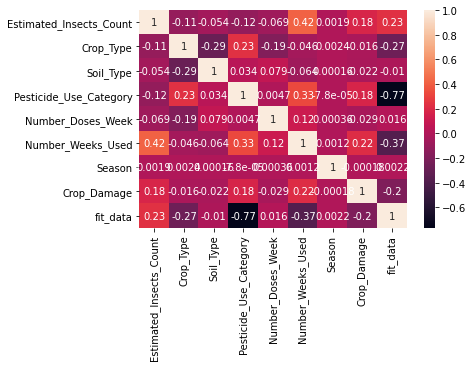

In [109]:
sns.heatmap(df.corr(),annot=True)

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148168 entries, 0 to 148167
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    148168 non-null  int64  
 1   ID                       148168 non-null  object 
 2   Estimated_Insects_Count  148168 non-null  float64
 3   Crop_Type                148168 non-null  int64  
 4   Soil_Type                148168 non-null  int64  
 5   Pesticide_Use_Category   148168 non-null  int64  
 6   Number_Doses_Week        148168 non-null  float64
 7   Number_Weeks_Used        148168 non-null  float64
 8   Season                   148168 non-null  int64  
 9   Crop_Damage              88858 non-null   float64
 10  fit_data                 148168 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 12.4+ MB


In [115]:
test_data=df[df['Crop_Damage'].isnull()]

In [116]:
train_data=df[df['Crop_Damage'].notna()]

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
X=train_data.drop(columns={'Crop_Damage'})

In [119]:
y=train_data['Crop_Damage']

In [172]:
#Scaling and train test split

In [120]:
from sklearn.preprocessing import RobustScaler

In [121]:
scaler=RobustScaler()

In [122]:
X=scaler.fit_transform(X)

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [124]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
rfc=RandomForestClassifier(n_estimators=1000,max_depth=20,min_samples_leaf=4,min_samples_split=15)

In [127]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
train_pred=rfc.predict(X_train)

In [129]:
test_pred=rfc.predict(X_test)

In [130]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93     52033
         1.0       0.71      0.23      0.35      8581
         2.0       0.77      0.01      0.02      1586

    accuracy                           0.86     62200
   macro avg       0.78      0.41      0.43     62200
weighted avg       0.84      0.86      0.82     62200



In [131]:
print(confusion_matrix(y_train,train_pred))

[[51621   409     3]
 [ 6578  2000     3]
 [ 1150   416    20]]


In [132]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.92     22205
         1.0       0.51      0.15      0.23      3726
         2.0       0.00      0.00      0.00       727

    accuracy                           0.84     26658
   macro avg       0.46      0.38      0.38     26658
weighted avg       0.78      0.84      0.79     26658



In [133]:
print(confusion_matrix(y_test,test_pred))

[[21858   346     1]
 [ 3158   555    13]
 [  549   178     0]]


In [134]:
rfc.feature_importances_

array([0.25892441, 0.0219899 , 0.01711725, 0.08740183, 0.16032763,
       0.27906161, 0.03536911, 0.13980825])

In [139]:
feat_importances = pd.Series(rfc.feature_importances_, index=train_df.drop(columns={'ID','Crop_Damage'}).columns) 
feat_importances

Estimated_Insects_Count    0.258924
Crop_Type                  0.021990
Soil_Type                  0.017117
Pesticide_Use_Category     0.087402
Number_Doses_Week          0.160328
Number_Weeks_Used          0.279062
Number_Weeks_Quit          0.035369
Season                     0.139808
dtype: float64

In [175]:
feat_importances.sort_values()

Soil_Type                  0.017117
Crop_Type                  0.021990
Number_Weeks_Quit          0.035369
Pesticide_Use_Category     0.087402
Season                     0.139808
Number_Doses_Week          0.160328
Estimated_Insects_Count    0.258924
Number_Weeks_Used          0.279062
dtype: float64

In [142]:
from lightgbm import LGBMClassifier

In [143]:
lg=LGBMClassifier()

In [144]:
lg.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [145]:
train_pred=lg.predict(X_train)

In [146]:
test_pred=lg.predict(X_test)

In [147]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     52033
         1.0       0.58      0.18      0.28      8581
         2.0       0.67      0.00      0.01      1586

    accuracy                           0.85     62200
   macro avg       0.70      0.39      0.40     62200
weighted avg       0.82      0.85      0.81     62200



In [148]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92     22205
         1.0       0.55      0.17      0.27      3726
         2.0       1.00      0.00      0.00       727

    accuracy                           0.85     26658
   macro avg       0.80      0.39      0.40     26658
weighted avg       0.82      0.85      0.80     26658



In [149]:
print(confusion_matrix(y_test,test_pred))

[[21882   323     0]
 [ 3076   650     0]
 [  527   199     1]]


In [153]:
out_data=scaler.transform(test_data.drop(columns={'Crop_Damage'}))

In [154]:
out_pred=lg.predict(out_data)

In [155]:
result_df=pd.concat([test_df['ID'],pd.DataFrame(out_pred)],axis='columns')

In [159]:
result_df.rename(columns={0:'Crop_Damage'},inplace=True)

In [160]:
result_df.to_csv('LGResult.csv',index=False)